In [1]:
!pip install -q gdown polars scikit-learn matplotlib seaborn

instalasi library yang diperlukan untuk pemrosesan data, model machine learning, dan visualisasi

In [2]:
import gdown

gdown.download_folder(
    url="https://drive.google.com/drive/folders/1CCKM44-w2GuI_iJdrxsmtMxbmif19Eic?hl=id",
    output="machine learning",
    quiet=False
)

Retrieving folder contents


Processing file 1claCjbjt0DzagdA2Ed3cOIWef3mbcO5s clusteringmidterm.csv


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1claCjbjt0DzagdA2Ed3cOIWef3mbcO5s
To: /content/machine learning/clusteringmidterm.csv
100%|██████████| 1.01M/1.01M [00:00<00:00, 12.0MB/s]
Download completed


['machine learning/clusteringmidterm.csv']

In [3]:
import os

os.listdir("machine learning")

['clusteringmidterm.csv']

In [26]:
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

meng import semua library untuk loading data, eksplorasi, preprocessing, training model ML, dan evaluasi

In [27]:
PATH = "machine learning/clusteringmidterm.csv"

df_pl = pl.read_csv(PATH) #membaca datset dengan polars
df = df_pl.to_pandas() #konversi ke pandas

print("Shape:", df.shape)
print(df.head())

Shape: (8950, 18)
  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                 

In [28]:
cust_id = df["CUST_ID"] #menyimpan CUST_ID agar tidak hilang
df = df.drop(columns=["CUST_ID"])

In [29]:
#IEDA (jumlah missing values)
print("\n--- Missing Values ---")
print(df.isna().sum())


--- Missing Values ---
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [30]:
#IEDA (statistik deskriptif awal untuk memahami skala tiap fitur)
print("\n--- Statistik Deskriptif ---")
display(df.describe())


--- Statistik Deskriptif ---


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


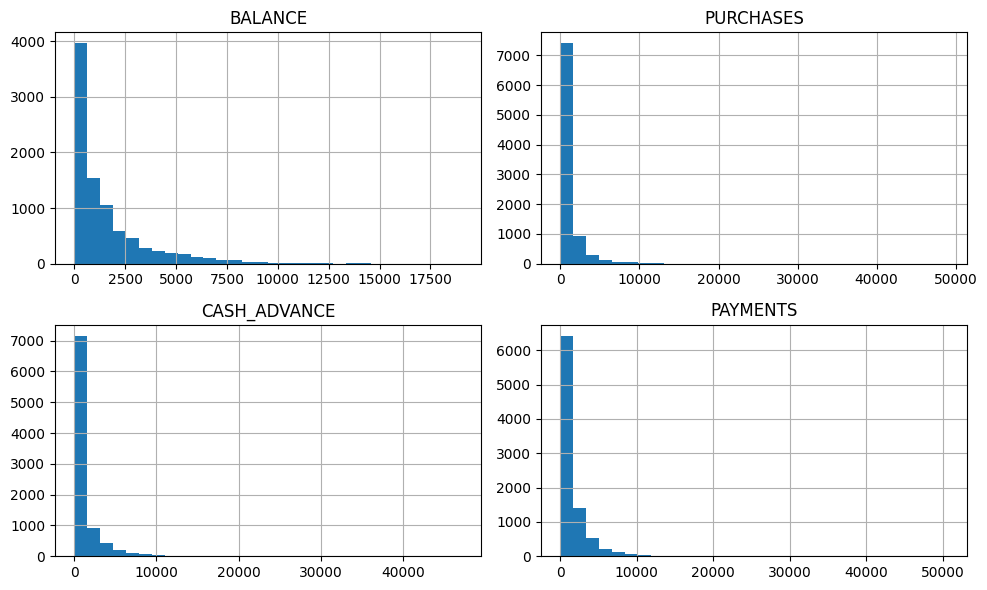

In [31]:
#visualisasi distribusi fitur utama untuk melihat pola penggunaan kartu
cols_plot = ["BALANCE", "PURCHASES", "CASH_ADVANCE", "PAYMENTS"]
df[cols_plot].hist(figsize=(10,6), bins=30)
plt.tight_layout()
plt.show()

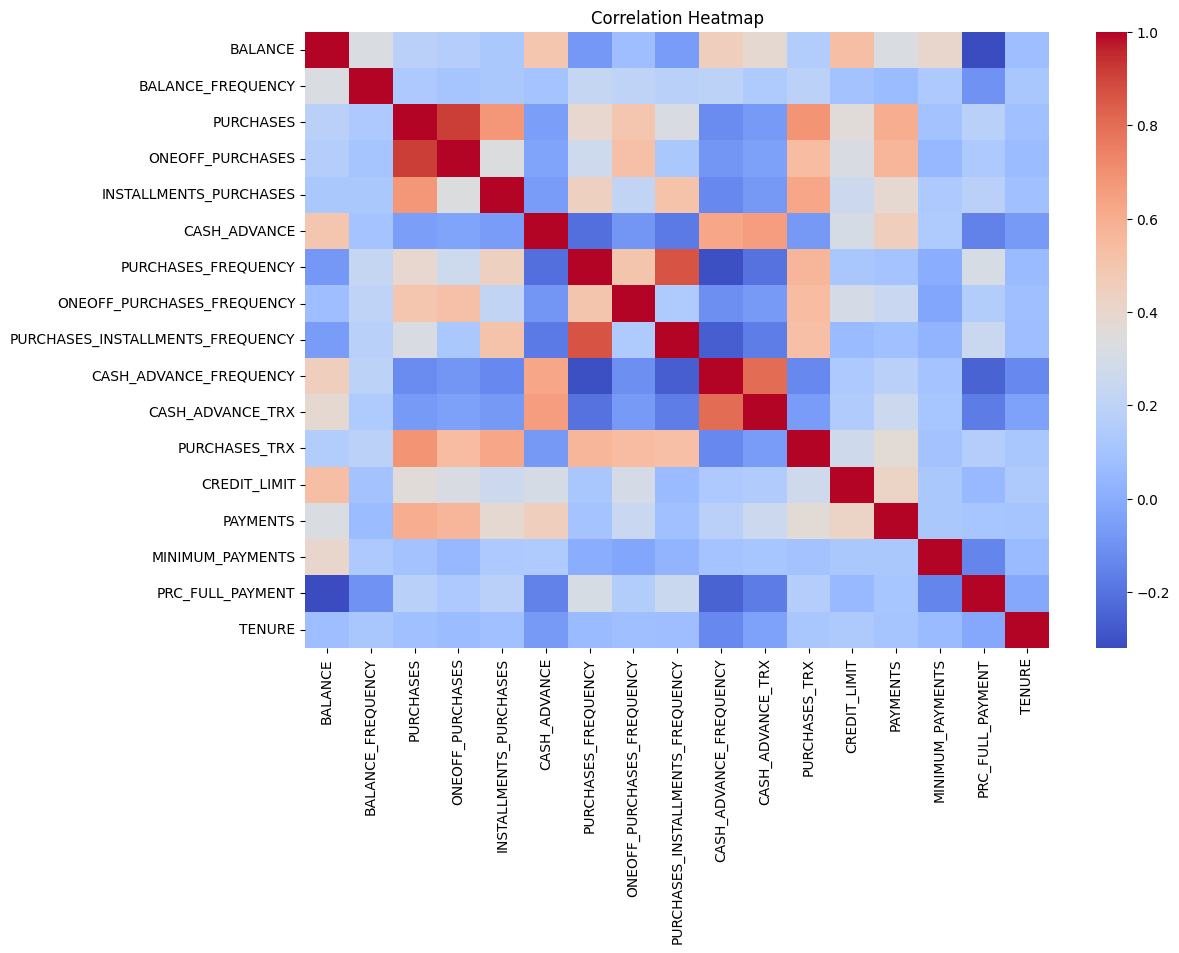

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap="coolwarm") #heatmap korelasi membantu melihat fitur mana yang saling berhubungan
plt.title("Correlation Heatmap")
plt.show()

In [33]:
#preprocessing
df = df.fillna(df.median())

missing values diisi median karena data numerik dan aman dari outlier

In [34]:
#untuk mengurangi pengaruh outlier ekstrem
for col in df.columns:
    q1 = df[col].quantile(0.01)
    q99 = df[col].quantile(0.99)
    df[col] = df[col].clip(q1, q99)

In [35]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

KMeans wajib scaling, karena tanpa scaling cluster akan bias terhadap fitur besar

In [36]:
inertia_list = []
sil_list = []
K = range(2, 8)

In [37]:
#menentukan jumlah cluster
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)

    inertia_list.append(km.inertia_)
    sil_list.append(silhouette_score(df_scaled, km.labels_))

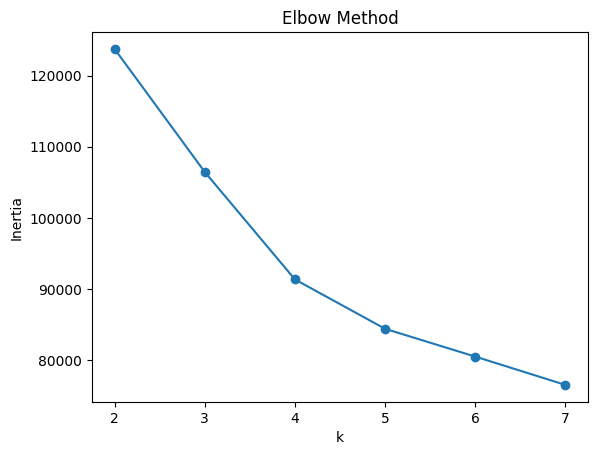

In [38]:
plt.plot(K, inertia_list, marker='o')
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

mencari titik tekukan inertia > cluster optimal

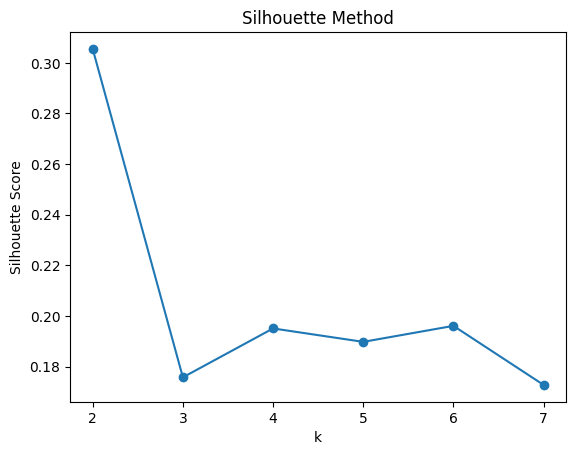

In [39]:
plt.plot(K, sil_list, marker='o')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Method")
plt.show()

evaluasi kualitas cluster, makin tinggi makin bagus

In [40]:
#memilih jumlah cluster terbaik berdasarkan silhouette
best_k = K[np.argmax(sil_list)]
print("Best Number of Clusters (silhouette):", best_k)

Best Number of Clusters (silhouette): 2


In [41]:
#final k-means
#train model clustering dengan jumlah cluster yang optimal
kmeans = KMeans(n_clusters=best_k, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

In [42]:
df_clustered = pd.DataFrame(df)
df_clustered["Cluster"] = clusters
df_clustered["CUST_ID"] = cust_id

mengembalikan CUST_ID + label cluster agar bisa dianalisis per pelanggan

In [43]:
print("\nPreview clustered data:")
display(df_clustered.head())


Preview clustered data:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,CUST_ID
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2.0,1000.0,201.802084,139.509787,0.000000,12,1,C10001
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0.0,7000.0,4103.032597,1072.340217,0.222222,12,1,C10002
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12.0,7500.0,622.066742,627.284787,0.000000,12,1,C10003
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1.0,7500.0,0.000000,312.343947,0.000000,12,1,C10004
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1.0,1200.0,678.334763,244.791237,0.000000,12,1,C10005


In [44]:
#interpretasi cluster
numeric_part = df_clustered.select_dtypes(include=[np.number])
cluster_summary = numeric_part.groupby(df_clustered["Cluster"]).mean()

print("\nCluster Summary:")
display(cluster_summary)


Cluster Summary:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
Cluster,,,,,,,,,,,,,,,,,,
0,2250.291325,0.979396,3341.251175,1995.033707,1261.481466,723.381160,0.933266,0.593769,0.734907,0.088569,2.268666,46.476683,7311.524981,3571.734152,1081.004653,0.271238,11.893513,0.0
1,1382.639694,0.855456,399.076989,210.734582,188.627622,983.390908,0.391427,0.115060,0.281694,0.144167,3.260388,6.931657,3840.561278,1220.079094,672.898621,0.127466,11.433297,1.0


menghitung rata-rata fitur per cluster untuk mengetahui karakter tiap segmen pelanggan

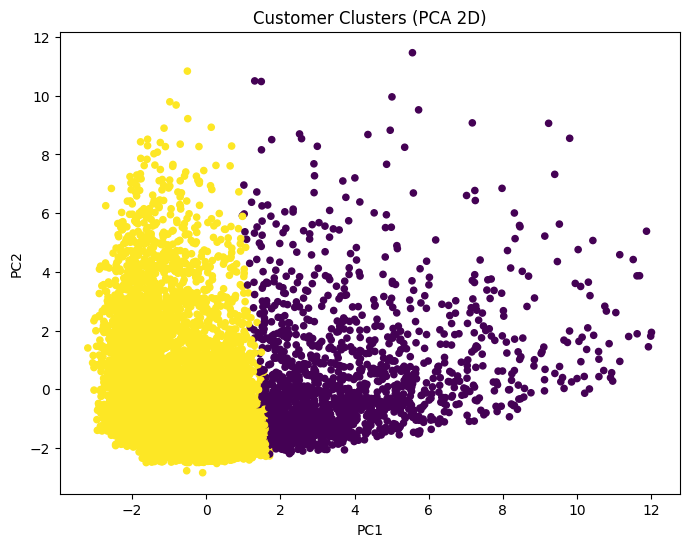


done guyssss


In [45]:
#visualisasi PCA
pca = PCA(n_components=2) #visualisasi 2D
p2 = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(p2[:,0], p2[:,1], c=clusters, cmap="viridis", s=20) #menunjukkan sebaran cluster yang terbentuk
plt.title("Customer Clusters (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("\ndone guyssss")